# 投票の幾何学入門(Basic Geometry of Voting)

このノートは Donald G. Saari, Basic Geome Springer の読書記録である。

# 第1章 投票に関する諸問題(ある投票の寓話から選挙手順まで)

"From an Election Fable to Election Procedures"

この章は、イントロダクション。
ある架空の学部の宴会で提供する飲み物を選ぶ投票の話から始まり、多数決(plurality/majority vote)、決戦投票(runoff)、ペア比較(pairwise comparison)、ボルダルール(Borda count)、戦略的投票(strategic voting), etc を具体的に導入し、投票による意思決定の難しさを見せる。
筆者は、この集約方法の分かりにくさが、投票結果を組み合わせ的に見る事による複雑さが原因として、幾何学的な視点から眺めると、捉えやすくなると言っている。

# 数学的記述

- 投票者(Voters): $\mathcal{V} = \{v_1, v_2, \dots, v_N\}$.
    - すべての投票者の集合
- 選択肢・候補(choices, candidates): $\mathcal{C} = \{c_1, c_2, \dots, c_m\}$.
    - すべての選択肢・候補の集合
- 重み関数(weight function): $w:\mathcal{C} \rightarrow \mathbb{R}$.
    - 選択肢・候補に付与される重み。$\mathbb{R}$ に値をとる。
    - 投票者おのおのが選択肢に対して与える選好を表す。
- 重み空間(weight space): $\mathcal{W} = \{w| w \text{ is a weight function}\}$
    - すべての重み関数の集合。集約ルールによって、特定の部分集合に制限される
    - 例：多数決重み: $\mathcal{W}_{pl} = \{w| w(\mathcal{C})= \{\text{all one-hot vectors} \}\}$
- 投票(voting): $E:\mathcal{V} \rightarrow \mathcal{W}$.
    - 投票者の選好を表す関数。各投票者に重み関数を一つ対応させる。
- 投票空間(voting space): $\mathcal{E} = \{ E:\mathcal{V} \rightarrow \mathcal{W}\} \simeq \mathcal{W}^{|\mathcal{V}|} $
    - 全投票者のすべての可能な選好を表す集合。
- 集約ルール: $R:\mathcal{E} \rightarrow \mathbb{R}^m$.
    - 投票空間から、全体の選好（社会的選好）への写像。
    - 例: 線形的な集計(linear tally): $LT:\mathcal{E} \rightarrow \mathbb{R}^m$, 
        - $E \mapsto \sum_{v \in \mathcal{V}} E(v)$    
- 得点空間(Tally space) $\mathbb{T}:= R(\mathcal{W}^{|\mathcal{V}|}) \subseteq \mathbb{R}^m$
    - ある集約ルールの下行われた選挙の可能な結果全体を表す空間。


# 第2章 順序付け投票とペアワイズ投票の幾何学

"Geometry for Positional and Pairwise Voting"

## 2.1 領域の順序付け (Ranking Regions p.30~)

**定義 2.1.1.**
多数決(plurality election)とは、各投票者が自分の最も好ましい候補に1ポイントを投票する選挙である。候補のランキングは各候補に与えられたポイントの合計 $p(c_i)$ で決まる。$p(c_i) > p(c_j)$ の時、$c_i \succ c_j$、$p(c_i) = p(c_j)$ の時、$c_i \sim c_j$ と書く。

$\mathcal{C} = \{c_1, c_2, c_3\}$ の場合を考える。

この場合、$\mathbb{T} = \mathbb{R}_{\ge 0}^3 = \{(x_1, x_2, x_3) \in \mathbb{R}^3 | x_i \ge 0 \}$ である。

投票結果 $n = (n_1, n_2, n_3) \in \mathbb{T}$ は、自然な方法で候補の順序付けを決定する。例えば $(45, 75, 80)$ なら、 $c_3 \succ c_2 \succ c_1$ である。

**正規化された集計結果(normalized election tally)**

ある選挙結果 $n \in \mathbb{T}$ に対し、その $l_1$-ノルムを $\lVert n \rVert_1 := \sum_i |n_i|$ とする。この時、
$$ \textbf{q} = \frac{n}{\lVert n \rVert_1 }$$
を __*正規化された集計結果*__ と言う事にする。

$\textbf{q}$ の各成分は対応する候補の得た票の全体に対する割合を表している。

ここで、$\textbf{q}$ は
$$q_k \ge 0, \quad \sum_i q_i = 1$$
を満たすが、これは $\mathbb{R}_{\ge 0}^3$ 内の単位単体(a unit simplex)
$$Sim(3)= \{x \in \mathbb{R}_{\ge 0}^3 | \lVert x \rVert_1 = 1\}$$
の1点と考えることができる。この __*表現三角形*__ (representation triangle) は、３つの満場一致結果(unanimity outcome) $\textbf{e}_1 = (1,0,0), \textbf{e}_2 = (0,1,0), \textbf{e}_3 = (0,0,1)$ を通る正三角形である。

In [1]:
%matplotlib notebook

from math import sqrt
from typing import Dict, List, NamedTuple, Optional, Tuple

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

<IPython.core.display.Javascript object>


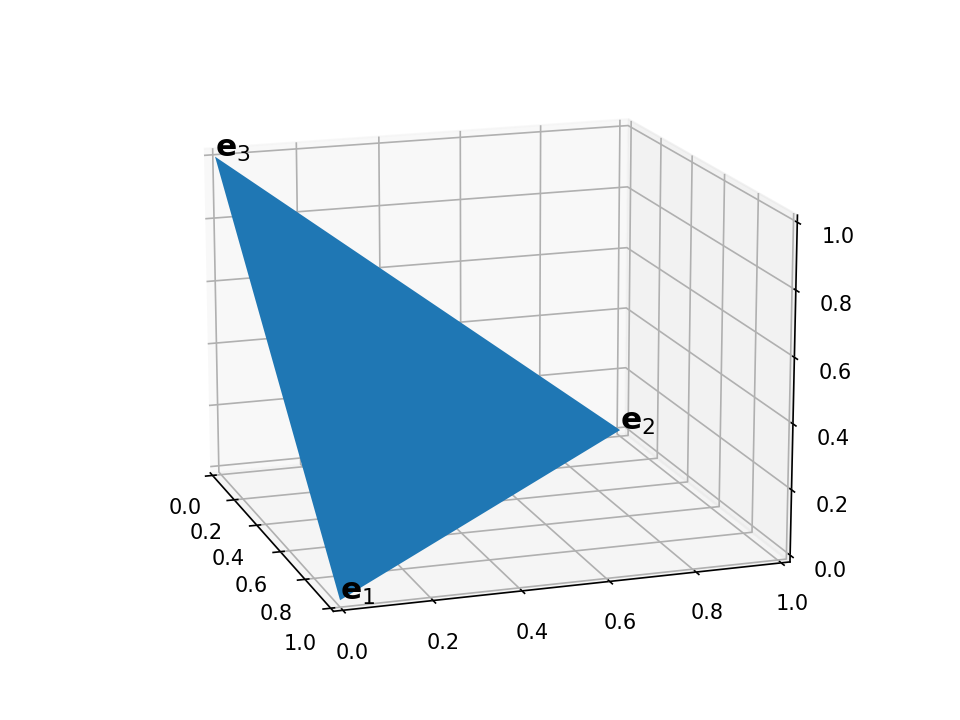

[[(1, 0, 0), (0, 1, 0), (0, 0, 1)]]


In [2]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

e1 = [1,0,0]
e2 = [0,1,0]
e3 = [0,0,1]

verts = [list(zip(e1, e2, e3))]
print(verts)
ax.add_collection3d(Poly3DCollection(verts))
for i, e in enumerate([e1, e2, e3], start=1):
    ax.text3D(*e, "$\mathbf{e}_" + f"{i}$", size=15)
plt.show()

「近ければ近いほど良い」という恋愛のように、$\textbf{q} \in Sim(3)$ に割り当てられる順位は、$\textbf{q}$ の各頂点への近さで決まる: $\textbf{q}$ が $\textbf{e}_k$ に近いほど、その選挙では候補 $c_k$ が好まれている事になる。

表現三角形は、13種類の推移的な選好に対応する領域に分ける事ができる。

- 狭義順序 $c_i \succ c_j \succ c_k$ 6種類
- 2つが同位の順序 $c_i \succ c_j \sim c_k, c_i \sim c_j \succ c_k$ 6種類
- 全同位 $c_1 \sim c_2 \sim c_3$ 1 種類

逆に、推移的な選好関係はこの13種類のみなので、表現三角形が推移的選好関係の幾何的な表現を与えていると考える事ができる。

In [3]:
origin = np.zeros(2)
basis = np.array([[-sqrt(3)/2, -1/2], [sqrt(3)/2, -1/2], [0, 1]])
labels1 = [r'$c_1$', '$c_2$', '$c_3$']
labels2 = [r'$\mathbf{e}_1$', r'$\mathbf{e}_2$', r'$\mathbf{e}_3$']
contour = np.append(basis, basis[:1], axis=0)

class Region(NamedTuple):
    name: str
    vertices: List[np.array]
        
class TextColors(NamedTuple):
    region_label: str = "lightgrey"
    base_labels: str = "grey"

regions = [Region("1", [origin, basis[0], (basis[0] + basis[1])/2]),
           Region("2", [origin, basis[0], (basis[0] + basis[2])/2]),
           Region("3", [origin, basis[2], (basis[2] + basis[0])/2]),
           Region("4", [origin, basis[2], (basis[2] + basis[1])/2]),
           Region("5", [origin, basis[1], (basis[1] + basis[2])/2]),
           Region("6", [origin, basis[1], (basis[1] + basis[0])/2])]

downword_v = np.array([0.0, -0.15])
left_upward_v = np.array([-0.075, 0.075])
right_upward_v = np.array([0.075, 0.075])
projection_coords = [3/4*basis[0] + 1/4*basis[1] + downword_v,
                    3/4*basis[0] + 1/4*basis[2] + left_upward_v,
                    1/4*basis[0] + 3/4*basis[2] + left_upward_v,
                    3/4*basis[2] + 1/4*basis[1] + right_upward_v,
                    1/4*basis[2] + 3/4*basis[1] + right_upward_v,
                    3/4*basis[1] + 1/4*basis[0] + downword_v,
                    ]

def draw_on_rep_triangle(tallies:Optional[Tuple[np.array, str]] = None,
                         region_labels: Optional[Dict[str, str]] = None,
                         base_labels: List[str] = labels1,
                         text_cols: TextColors = TextColors(),
                         projections: Optional[List[str]] = None,
                         figsize=(15, 12)
                        ):
    cm = 1/2.54
    plt.figure(figsize=np.array(figsize)*cm)
    for region in regions:
        centre = sum(region.vertices)/3
        name = region_labels[region.name] if region_labels else region.name
        plt.text(*centre, name, 
                 horizontalalignment='center',
                 verticalalignment='center',
                 size= 20, color=text_cols.region_label)
    if projections: 
        for string, coords in zip(projections, projection_coords):
            plt.text(*coords, string, 
                 horizontalalignment='center',
                 verticalalignment='center',
                 size= 20, color=text_cols.region_label)
        

    # Outer boundary of the representation triangle
    plt.plot(*contour.transpose(), '--', color='grey')

    # Indifference lines (or tie lines)
    for base in basis:
        plt.plot(*np.array([base, -1/2 * base]).transpose(), color='black')

    # Unanimity points    
    # plt.plot(*basis.transpose(), 'o', color='grey')

    # Draw texts at unanimity points
    for label, coord in zip(base_labels, basis):
        x, y = 1.07 * coord - 0.025
        plt.text(x, y, label, size=13, color=text_cols.base_labels)

    # Draw election results
    if tallies:
        handles = []
        for tally, label in tallies:
            coord = np.matmul(basis.transpose(), normalize(tally)).transpose()
            point, = plt.plot(*coord, '*', label=label + ": " + join_lin_ord_latex(get_lin_order(list(zip(labels1, tally)))))
            handles.append(point)
            plt.text(*(coord + 0.02), label, size=15, verticalalignment="center")

        plt.legend(handles=handles)
    plt.axis('off')
    plt.show()


def normalize(tally):
    return tally/sum(tally)


def get_lin_order(tally):
    weight_to_cand = {}
    for cand, weight in tally:
        current_list = weight_to_cand.get(weight, [])
        weight_to_cand[weight] = current_list + [cand]
    return sorted(weight_to_cand.items(), reverse=True, key=lambda x: x[0])


def join_equivalents_latex(text):
    return "".join(text).replace("$$", " \sim ")


def join_lin_ord_latex(lin_ord):
    s = join_equivalents_latex(lin_ord.pop(0)[1])
    for item in lin_ord:
        s += " > " + join_equivalents_latex(item[1])
    return s
        

tally = np.array([("$c_1$", 1/2), ("$c_2$", 1/4), ("$c_3$", 1/4)])
lin_ord = get_lin_order(tally)
join_lin_ord_latex(lin_ord)

'$c_1$ > $c_2 \\sim c_3$'

<IPython.core.display.Javascript object>


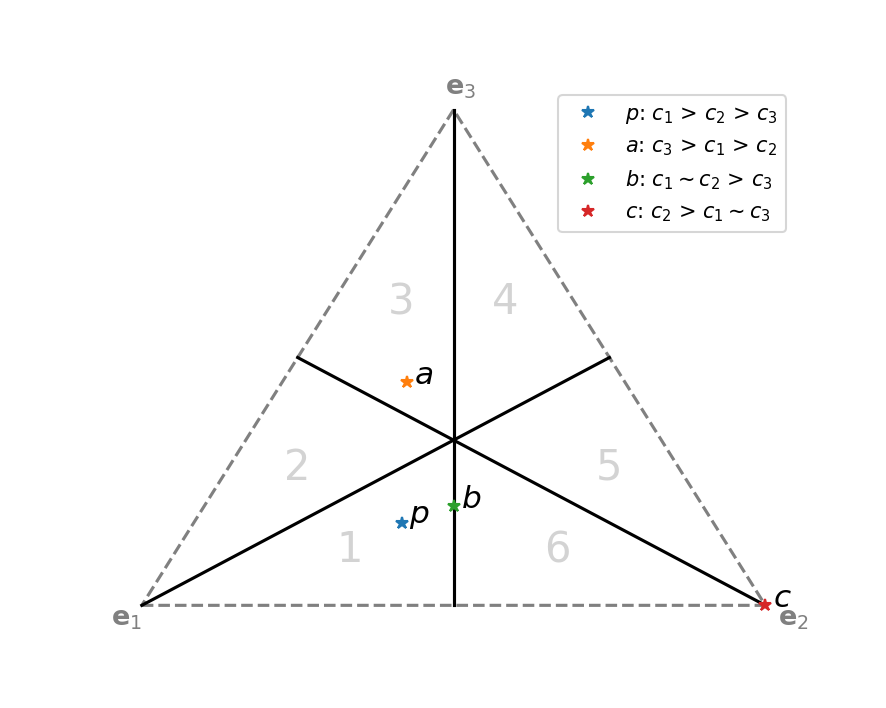

In [4]:
tallies = [(np.array([3, 2, 1]), "$p$"),
          (np.array([7/20, 4/20, 9/20]), "$a$"),
          (np.array([2/5, 2/5, 1/5]), "$b$"),
          (np.array([0, 1, 0]), "$c$")]

draw_on_rep_triangle(tallies, base_labels=labels2)

### 他の2項関係による図形
3つの選択肢 $\{c_1, c_2,c_3\}$ の選挙で、ペア $(c_i, c_j) \; c_i \ne c_j$ 毎の選好関係を、それぞれ独立に区間 $[-1,1]$ で表す場合を考える。
すなわち、ある投票の結果、以下のような集計関数があたえられるような場合を考える。
$$
p: \{ (c_1, c_2),(c_2,c_3),(c_3, c_1)\} \rightarrow [-1, 1]
$$
ここで
- $p(c_i,c_j) > 0$ の場合、 $c_i$ が $c_j$ より好まれている度合いを表し、 $c_i \succ c_j$ と記す。
- $p(c_i,c_j) < 0$ の場合、 $c_j$ が $c_i$ より好まれている度合いを表し、 $c_j \succ c_i$ と記す。
- $p(c_i,c_j) = 0$ の場合、 $c_i$ と $c_j$ は同順位であり、 $c_i \sim c_j$ と記す。

と定める。

各ペア $(c_i, c_j)$ に対応する区間は3つあるので、全ての可能な選挙結果の集合は $[-1,1]^3$ となり、選挙結果を表す幾何対象は立方体となる。

$i \ne j$ であるような各ペア $(c_i, c_j)$ ごとに、3つの選好関係 $\{\succ, \sim, \prec\}$ になりうるので、可能な全体の選好関係は $3^3 = 27$ 通りある。この中には、上で挙げた13種類の推移的な順序関係以外の、非推移的な順序関係も($27 - 13 = 14$ 種類)含まれている。

非推移的な順序
- $c_i \succ c_j \succ c_k \succ c_i$, 循環的(cyclic)
    - 立方体の中で、下に示す2つの部分立方体の内部に対応
- $c_i \succ c_j \succ c_k$ かつ $c_i \sim c_k$ 非循環的(acyclic)
    - 上記の領域に接する平面（輪郭は省く）
- $c_i \sim c_j \sim c_k$ かつ $c_i \succ c_k$ 非循環的(acyclic)
    - 立方体の中の3軸にあたる領域

### More examples in the exercises to appear here,,,



In [5]:
1%3

1

<IPython.core.display.Javascript object>


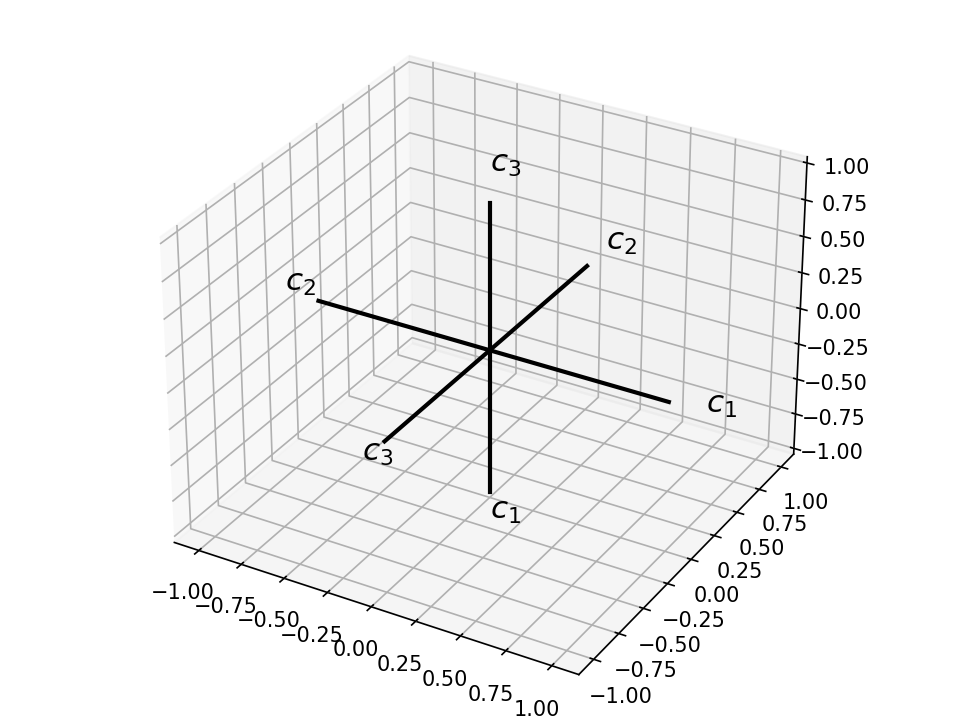

[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]


In [6]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)


# for axis in axis_list:
#     points, labels = list(zip(*axis))
#     ax.plot(*list(zip(*points)), color="blue")
#     for point, label in axis:
#         ax.text(*point, label, size=15)

def plot_axis_labels(ax,
                     line_extension=0.0,
                     line_color="black",
                     line_width=2,
                     label_size=15,
                     d_label=0.0,
                    ):
    axis_list = [[([1,0,0], "$c_1$"), ([-1,0,0], "$c_2$")],
                 [([0,1,0], "$c_2$"), ([0,-1,0], "$c_3$")],
                 [([0,0,1], "$c_3$"), ([0,0,-1], "$c_1$")]]

    for axis in axis_list:
        points, labels = list(zip(*axis))
        ax.plot(*list(zip(*(np.array(points) * (1 + line_extension)))), color=line_color, linewidth=line_width)
        for point, label in axis:
            print(point)
            point = [v if v == 0 else v * (abs(v) + d_label) for v in point ]
            ax.text(*point, label, size=label_size)


plot_axis_labels(ax, d_label=0.2)
plt.show()

<IPython.core.display.Javascript object>


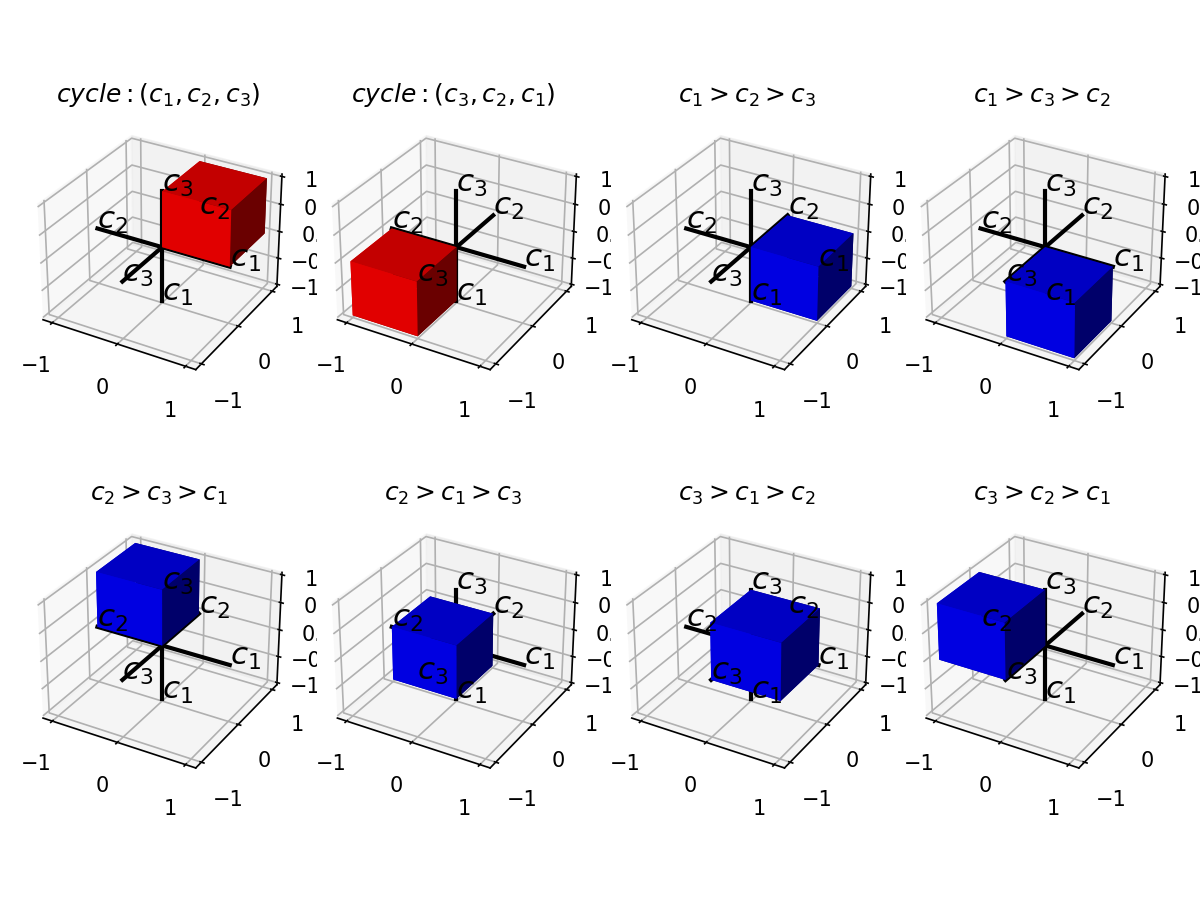

[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]
[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]
[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]
[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]
[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]
[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]
[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]
[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]


In [7]:
# prepare coordinates
vert_x, vert_y, vert_z = np.indices((3, 3, 3)) - 1
vox_x, vox_y, vox_z = np.indices((2, 2, 2)) - 0.5

# draw cuboids in the top left and bottom right corners
voxels = [
    ("$cycle:(c_1,c_2,c_3)$", "red", (vox_x >= 0) & (vox_y >= 0) & (vox_z >= 0)),
    ("$cycle:(c_3,c_2,c_1)$", "red", (vox_x <= 0) & (vox_y <= 0) & (vox_z <= 0)),
    ("$c_1 > c_2 > c_3$", "blue", (vox_x >= 0) & (vox_y >= 0) & (vox_z <= 0)),
    ("$c_1 > c_3 > c_2$", "blue", (vox_x >= 0) & (vox_y <= 0) & (vox_z <= 0)),
    ("$c_2 > c_3 > c_1$", "blue", (vox_x <= 0) & (vox_y >= 0) & (vox_z >= 0)),
    ("$c_2 > c_1 > c_3$", "blue", (vox_x <= 0) & (vox_y >= 0) & (vox_z <= 0)),
    ("$c_3 > c_1 > c_2$", "blue", (vox_x >= 0) & (vox_y <= 0) & (vox_z >= 0)),
    ("$c_3 > c_2 > c_1$", "blue", (vox_x <= 0) & (vox_y <= 0) & (vox_z >= 0)),
]
# combine the objects into a single boolean array
# voxels = cycle1 | c_123
# print(voxels)

fig, axes_list = plt.subplots(2, 4, subplot_kw=dict(projection="3d"), figsize=(8,6))

for ax, (name, col, voxel) in zip([ax for row in axes_list for ax in row], voxels):

    # facecolors = np.where(voxel, '#5555CC90', '#FFD65D90')
    facecolors = np.where(voxel, col, '#FFD65D90')
    # edgecolors = np.where(voxel, '#7D84A6', '#BFAB6E')
    # print(facecolors)
    ax.set_title(name)
    ax.voxels(vert_x, vert_y, vert_z,
              voxel, facecolors=facecolors)
    plot_axis_labels(ax)
#    for axis in axis_list:
#        points, labels = list(zip(*axis))
#        ax.plot3D(*list(zip(*points)), color="black", linewidth=2)
#        for point, label in axis:
#            ax.text(*point, label, size=12)   

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


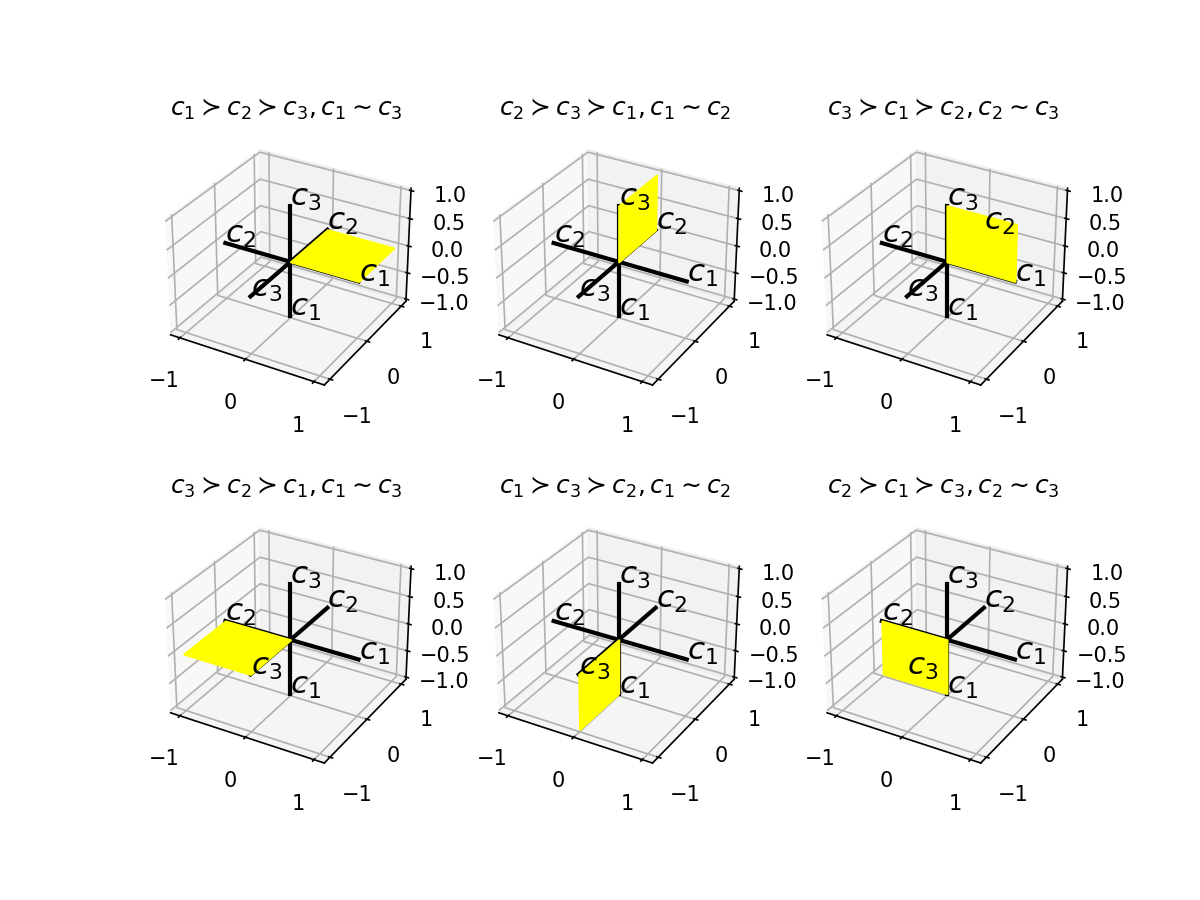

[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]
[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]
[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]
[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]
[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]
[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]


In [8]:
fig, axes_list = plt.subplots(2, 3, squeeze=False, subplot_kw=dict(projection="3d"), figsize=(8,6))

origin3 = np.zeros(3)
e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
e3 = np.array([0,0,1])

squares = [("$c_1 \succ c_2 \succ c_3, c_1 \sim c_3$", "yellow", np.array([origin3, e1, e1 + e2,  e2])),
           ("$c_2 \succ c_3 \succ c_1, c_1 \sim c_2$", "yellow", np.array([origin3, e2, e2 + e3,  e3])),
           ("$c_3 \succ c_1 \succ c_2, c_2 \sim c_3$", "yellow", np.array([origin3, e1, e1 + e3,  e3])),
           ("$c_3 \succ c_2 \succ c_1, c_1 \sim c_3$", "yellow", np.array([origin3, -e1, -e1 - e2,  -e2])),
           ("$c_1 \succ c_3 \succ c_2, c_1 \sim c_2$", "yellow", np.array([origin3, -e2, -e2 - e3,  -e3])),
           ("$c_2 \succ c_1 \succ c_3, c_2 \sim c_3$", "yellow", np.array([origin3, -e1, -e1 - e3,  -e3])),
          ]

for ax, (name, col, square) in zip([ax for row in axes_list for ax in row], squares):
    ax.set_title(name)
    ax.add_collection3d(Poly3DCollection([square], color=col))
    plot_axis_labels(ax)
#    for axis in axis_list:
#        points, labels = list(zip(*axis))
#        ax.plot3D(*list(zip(*points)), color="black", linewidth=2)
#        for point, label in axis:
#            ax.text(*point, label, size=12)   

#plt.tight_layout()
plt.show()

## 2.2 投票プロファイルと選挙写像
"Profiles and Election Mappings"

ここでは、各投票者の選好が、狭義線形順序(strict linear order)がであると仮定する。

投票者の型(type)とは、その投票者の候補のランク付けのこととする。全部で $m!$ 通りの可能性がある。i.e. $m!$ の投票者型がある。

今, $m=3$ の場合を考え、以下のように型に番号を振り分ける。

|型|ランキング |
|-|-|
|1|$$c_1\succ c_2 \succ c_3$$|
|2|$$c_1\succ c_3 \succ c_2$$|
|3|$$c_3\succ c_1 \succ c_2$$|
|4|$$c_3\succ c_2 \succ c_1$$|
|5|$$c_2\succ c_3 \succ c_1$$|
|6|$$c_2\succ c_1 \succ c_3$$|

__*定義2.2.1*__ (p.38) $p_j$ を、$j$ 番目の型($j=1,\dots,n!$) の全体に対する割合を表すとする。ベクトル $\textbf{p} = (p_1,\dots,p_{n!})$ を __(正規化)投票プロファイル__ と呼ぶ。

例. $\{c_1,c_2,c_3\}$ の場合、$(\frac{1}{6}, 0, \frac{1}{3}, 0,\frac{1}{2}, 0)$ は

|型|ランキング |割合|
|-|-|-|
|1|$$c_1\succ c_2 \succ c_3$$|$$\frac{1}{6}$$|
|2|$$c_1\succ c_3 \succ c_2$$|$$0$$|
|3|$$c_3\succ c_1 \succ c_2$$|$$\frac{1}{3}$$|
|4|$$c_3\succ c_2 \succ c_1$$|$$0$$|
|5|$$c_2\succ c_3 \succ c_1$$|$$\frac{1}{2}$$|
|6|$$c_2\succ c_1 \succ c_3$$|$$0$$|

というプロファイルを表す。

一般に、$\{c_1,c_2,\dots,c_n\}$ の場合、選挙プロファイルは、$n!$ 次元単位単体
$$
Si(n!) = \left\{\mathbf{y} = (y_1,\dots,y_n) \in \mathbb{R}^{n!}\middle| \; y_j \ge 0, \sum_{j=1}^{n!}y_j = 1\right\}
$$

の有理点である。$Si(n!)$ を、正規化選挙プロファイル空間とよぶ事にする。

$n!$ は、選択肢の増加と共にすぐに大きくなるので、直接 $Si(n!)$ を可視化し、見たり、直感的に考察したりするのは不可能である。しかし、我々の考察にとって、この $Si(n!)$ こそが本丸なので、使ってどうにか理解する必要がある。そこで、幾何学である。

満場一致プロファイル $\mathbf{E}_i$ とは、$j$-成分が $(\mathbf{E}_i)_j = \delta_{ij}$ (Kronecker's delta)となるようなベクトルである。

6つの満場一致プロファイル $\{\mathbf{E}_i\}_{i=1}^{6}$ は、$Si(6)$ の頂点であり、$Si(6)$ はこの頂点の
$$
Si(6) = \left\{\mathbf{p} = (p_1,\dots,p_6) = \sum_{j=1}^6 p_j \mathbf{E}_j \; \middle| \; p_j \ge 0, \sum_{j=1}^{n!}p_j = 1\right\}
$$

という線形和で表す事ができる(非負正規化重みによる線形結合)。

6次元空間の対象はこのままでは理解することは難しいが、第3章で導入する座標系によって、3つの選択肢の選挙プロファイルを「見る」事が可能になる。

ここでは、一先ず原始的だが有益な選挙プロファイルの表現方法を挙げておく

#### 例:
いま、各投票者の選好が狭義線形順序であると仮定しているので、可能な選好は6通りである。これらの順序は、表現三角形 $Sim(3)$ の6つの領域と対応しているので、選挙プロファイルの各成分を対応する領域に割り当てる事で、プロファイルを可視化する事ができる。例えば、$\mathbf{p} = \left(0, \frac{1}{2}, 0, \frac{1}{3}, 0, \frac{1}{6} \right)$ を以下のようにプロットできる。

<IPython.core.display.Javascript object>


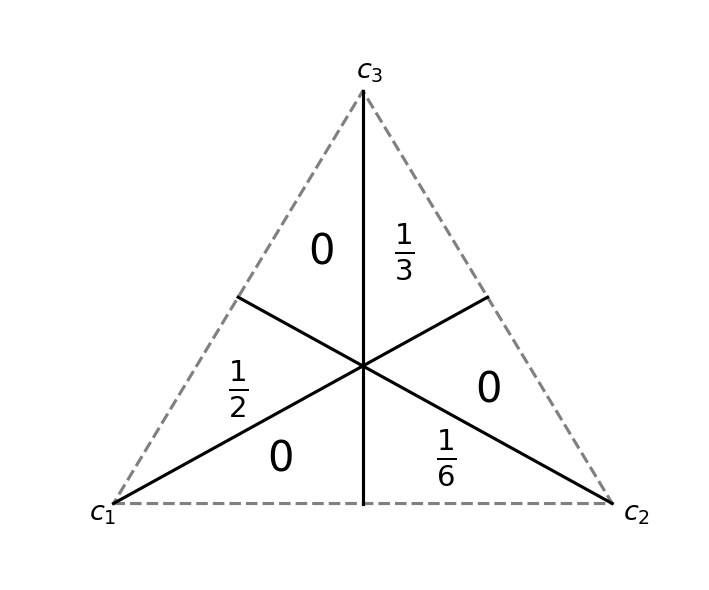

In [9]:
draw_on_rep_triangle(region_labels={"1": r"$0$",
                                   "2": r"$\frac{1}{2}$",
                                   "3": "$0$",
                                   "4": r"$\frac{1}{3}$",
                                   "5": r"$0$",
                                   "6": r"$\frac{1}{6}$"},
                    text_cols=TextColors(region_label="black", base_labels="black"),
                    figsize=(12, 10))

### 2.2.1 選挙写像 (The Election Mapping)

__定義__
選挙写像(Election mapping) $f$ とは、
$$
f: \mathbb{P} = Si(m!) \rightarrow Si(m) = \mathbb{T}
$$
のことである。すなわち、正規化された選挙プロファイル空間 $\mathbb{P}$ から、正規化された選挙結果の空間 $\mathbb{T}$  への写像である。

__例：多数決の場合__

$f:Si(6) \rightarrow Si(3)$ を以下のような線形写像とすれば、$m=3$ の多数決の場合の選挙写像が作ることができる.

$\{\mathbf{E}_1, \mathbf{E}_2\}$ は $c_1$ を、$\{\mathbf{E}_5, \mathbf{E}_6\}$ は $c_2$ を, $\{\mathbf{E}_3, \mathbf{E}_4\}$ は $c_3$ を一番に選好している事から、まずは、基底 $\{\mathbf{E}_{j}\}_{j=1}^6$ に対して
$$
f(\mathbf{E}_j) =
\begin{cases}
  \mathbf{e}_{1}   & \lceil \frac{j}{2} \rceil = 1 \\
  \mathbf{e}_{3}   & \lceil \frac{j}{2} \rceil = 2 \\
  \mathbf{e}_{2}   & \lceil \frac{j}{2} \rceil = 3  
\end{cases}
$$
とする。こうすれば、一般の元 $\mathbf{p} \in \mathbb{P}$ に対しては
$$
f(\mathbf{p}) = f\left(\sum_{j=1}^6 p_j \mathbf{E}_j\right) = \sum_{j=1}^6 p_j f\left(\mathbf{E}_j\right)\\
= (p_1 + p_2, p_5 + p_6, p_3 + p_4)
$$
となる。
### 2.2.2 選挙結果の幾何学(The Geometry of Election Outcomes)
これまでは、有限人の投票者による、一人一票、すなわち全員が等しい重みを持つ投票を考えてきたが、この場合、選挙結果は必ず $\mathbb{Q}^m$ の部分空間になる。なので、選挙結果の空間として、$\mathbb{Q}^m \subseteq \mathbb{T} \subseteq \mathbb{R}^m$ を考えるのは、不要な一般化をしているのではないかとの、疑念が生じる。

しかし、より一般には、任意の実数による、投票者への重み付けによる投票や、投票者数が無限になる極限を含む状況などを考察対象にする事により、選挙結果空間として、 $\mathbb{Q}^m \subseteq \mathbb{T} \subseteq \mathbb{R}^m$ を考えた方が、一般性が高くなる事が分かる。よって、この本では、特別の記述がない限り、これからは選挙結果ベクトルの成分が無理数の値を取る場合も含むことを暗に仮定する。

### More examples in the exercises to appear here,,,

<IPython.core.display.Javascript object>


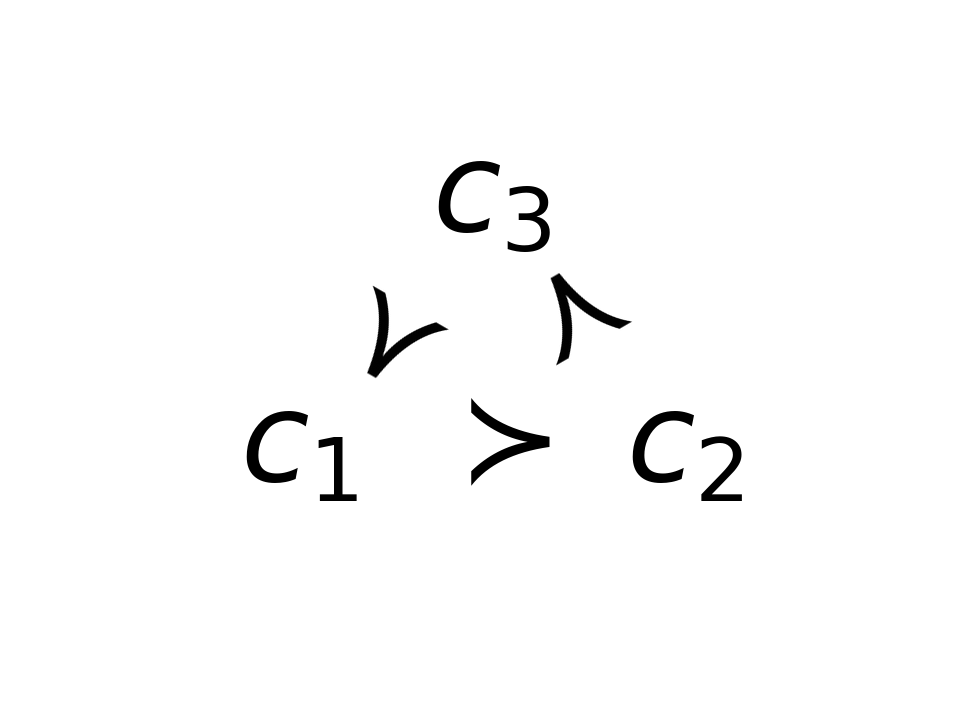

In [19]:
fig = plt.figure()
ax = plt.axes()
plt.axis([-1, 1, -1, 1])
#ps = [np.array([-sqrt(3)/2, -1/2]),
#     np.array([sqrt(3)/2, -1/2]),
#     np.array([0, 1])]
ps = np.array([[-sqrt(3)/2, -1/2],
     [sqrt(3)/2, -1/2],
     [0, 1]])
ps *= 0.6
labels = ["$c_1$", "$c_2$", "$c_3$"]
relations = [("$\succ$", 0), ("$\succ$", 120), ("$\succ$", 240)]
h_width = 0.05
h_length = 0.1
#ax.arrow(*p0, *(p1 -p0), linestyle="--", head_width=h_width, head_length=h_length, length_includes_head=True, fc='k', ec='k')
#ax.arrow(*p1, *(p0 -p1), ls="--", head_width=h_width, head_length=h_length, length_includes_head=True, fc='k', ec='k')
#ax.arrow(*p0, *(p2 -p0), head_width=h_width, head_length=h_length, length_includes_head=True, fc='k', ec='k')
#ax.arrow(*p1, *(p2 -p1), head_width=h_width, head_length=h_length, length_includes_head=True, fc='k', ec='k')

c_size = 70
for i, (p, label, relation) in enumerate(zip(ps, labels, relations)):
    ax.text(*p, label, size=60, horizontalalignment='center', verticalalignment='center')
    ax.text(*((p + ps[(i + 1)%3])/2), relation[0], rotation=relation[1], size=60, horizontalalignment='center', verticalalignment='center')

#t = ax.text(*((p0 + p1)/2), "$\sim $", size=50, horizontalalignment='center', verticalalignment='top')
# t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='grey'))

#ax.annotate("$c_2$", size=50,
#            xy=p0, xycoords='data',
#            xytext=p1, textcoords='data',
#            arrowprops=dict(arrowstyle="<->",
#                            connectionstyle="arc3"),
#            )


plt.axis('off')
plt.show()


# 第3章 コンドルセの問題

"Problem with Condorcet"

この章では、ペア多数決(pairwise majority voting)の問題について論じる。

ペア全勝者(コンドルセ勝者)を、選挙の勝者とするのは問題がある。なぜなら、ただ一つのペア全勝者が常に決定するとは限らないからだ。その原因は、コンドルセサイクル(Condorcet cycle)の存在による（サイクルでは全員が全員に勝利する）。

## 3.1「理性的な投票者」
"Why can't an organization be like a person?"

古典的な経済学では、以下の例を根拠に「理性的な投票者（もしくは行動）は推移的な選好を持つ」という仮定がなされてきた。

### The Money Pump
スージーは、以下の循環的な選好を持つとする
- イチゴ($c_1$)をアップルパイ($c_2$)より好む
- アップルパイ($c_2$)をラズベリー($c_3$)より好む
- ラズベリー($c_3$)をイチゴ($c_1$)より好む

まず、スージーはイチゴとラズベリーのどちらか好きな方を選んで貰えるとする。その場合、もちろん彼女はラズベリーを選ぶ。

そこへ、スージーの好みをすべて把握しているマイクがやって来て、「＄1払えば、そのラズベリーとアップルパイを交換してあげるよ」とスージーに話を持ちかける。ラズベリーよりもアップルパイを好むスージーはこの話に乗り、マイクに＄1払ってラズベリーとアップルパイを交換する。

そして、ずる賢いマイクは、今度はイチゴを持ってきて、今度は＄1 払えば、そのアップルパイをとイチゴを交換すると話を持ち込み、そしてスージーは再び＄1を払い交換する。

するとマイクは、今度はラズベリーを持ってきて、同じように＄1でイチゴとラズベリーを交換すると言い、スージーは応じ、彼女は再び元のラズベリーを手元に持つことになった。だが、何故か彼女の財布からは＄3が無くなってしまっている！

そして、マイクは今度は、アップルパイを持ってきて,,,

という風にマイクはスージーの有り金がなくなるまで、交換の話を持ちかけることができるのである。

しかし、スージーはそこまで愚かではないので（理性的に思考できるので）、すぐにこの罠に気づき、自分の選好を推移的なものへと変更するであろう。


経済学・社会的選択理論では、この例から、各投票者の選好は理性的＝推移的であるという仮定は一般的な妥当性があるとされる。

特に、投票において各投票者が推移的な選好を持つという仮定は理性的な投票者の選好を表し、そのような投票者による選挙の結果がどのような性質を持つかを調べる事には一定の意味があると言える。

しかし、コンドルセサイクルが示すように、各投票者の選好が推移的でも、その選挙結果は循環的にはならないことがある。

集団は理性的な振る舞いをするとは限らないのである。

### 3.1.1 混乱した、非理性的な投票者

- ペア多数決(pairwise voting)は、投票データの重要な情報を無視する
    - 投票者の各選好が非推移どうかの情報を切り捨ててしまう。
    - ペア多数決の集計は、各投票者の選好が非推移的、特に循環的であっても、問題なく機能する
    
例えば、3人の投票者、3つの選択肢で、投票者が各々で3つのペア毎の勝敗を選び、投票するとしよう。

もし、2人が $A =\{c_1 \succ c_2, c_2 \succ c_3, c_3 \succ c_1\}$ という選好を支持し、残りの一人が $A^c = \{c_2 \succ c_1, c_1 \succ c_3, c_3 \succ c_2\}$ を支持しているとして、選択肢のペア毎に多数決を取れば、$A$ が勝者がになるが、これは循環的な選好である。

これは、混乱した投票者による選挙であって、その結果も混乱したしたものであるのは、特に驚くべきことでもない。

だが、ペア多数決の問題は、投票者が混乱していなくても（推移的な選好を選んでいたとしても）結果が非推移的でないことがある事である。

なぜそのような事が起こるのかを、コンドルセサイクルの例で見てみよう。

コンドルセサイクルでは、3人の投票者がそれぞれ $\{c_1 \succ c_2 \succ c_3\}, \{ c_2 \succ c_3 \succ c_1\},\{ c_3 \succ c_1 \succ c_2\}$ という推移的な選好を選ぶのであった。この時、ペア多数決では、ペア毎の選好に分解して多数決を取るのであった。

これは以下の表のように、9つのペア毎の選好を集計するという事であるが、この表の中のペア選好をカッコの下付き添字の番号によってアレンジして、上の循環的な選好の投票者による投票データに組み直す事が可能である。

|||||
|-|-|-|-|
|投票者1|$$(c_1 \succ c_2)_1$$|$$(c_2 \succ c_3)_2$$|$$(c_1 \succ c_3)_3$$|
|投票者2|$$(c_2 \succ c_1)_3$$|$$(c_2 \succ c_3)_1$$|$$(c_3 \succ c_1)_2$$|
|投票者3|$$(c_1 \succ c_2)_2$$|$$(c_3 \succ c_2)_3$$|$$(c_3 \succ c_1)_1$$|

よって、ペア多数決では、投票者の選好が推移的かどうかの区別ができないということになる。

これは、「理性的な投票者は推移的な選好を持つ」という重要な仮定を破壊してしまうという事を意味する。

我々は、この様なペア多数決を信頼することなどできない。

比べて、ボルダルール(Borda Count = BC)には、このような重要な情報(推移性)のロスは発生しない。

次の章で、BC が、ペア多数決に比べて優れている点について見ていく。

### 3.1.2 ペア多数決で失われる情報

選択肢が３つの場合、選挙プロファイルからペア多数決をすることは、視覚的に見れば、表現三角形内のプロファイルを「射影する」事に対応する（下の図参照）。この射影で選好に関する情報が失われるのであるが、では、具体的にどんな情報が失われるのであろうか？

それを以下説明する。

選択肢が３つ以上ある時、ある２つの選択肢の順序 $c_i \succ c_j$ の「選好度(intensity)の強弱」を以下の様に決める。

- 強い選好度(strong intensity)とは、ペア多数決では、 $c_i \succ c_j$ であるが、全体の選好順序ではその他の選択肢 $c_k, c_l,\dots$ によって、割り込まれる$c_i \succ c_k \succ c_l \succ \dots \succ c_j$事をいう。
- 弱い選好度(weak intensity)とは、ペア多数決での順序 $c_i \succ c_j$ が、全体の選好順序でもその他の選択肢によって割り込まれない事をいう。


選好度は、選好の度合いを客観的に測る実用的な指標である。「AよりかはBのほうが大分ましだ」という人に、「では C と比較したらどうでしょう？」と問うことで、その選好が強いのか弱いのか知ることができる。

選択肢が３つ以上ある時、ペア多数決を行うことはこの選好度の情報を潰す事を意味するのである。

逆に、ペアワイズ比較に対して選好度を問うということは、投票者に対して選好の推移性を促す簡単な方法である。

また、強い選好は推移性を要求し、循環的な選好は弱い選好しかない。


<IPython.core.display.Javascript object>


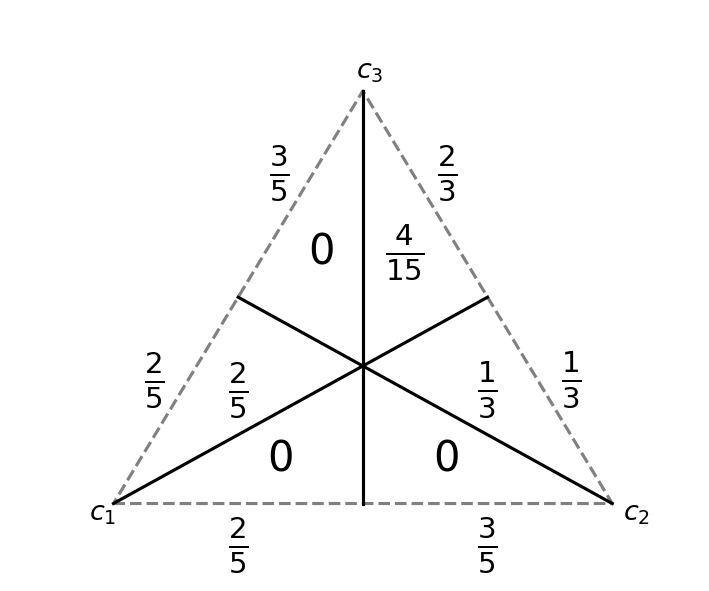

In [11]:
draw_on_rep_triangle(region_labels={"1": r"$0$",
                                   "2": r"$\frac{2}{5}$",
                                   "3": "$0$",
                                   "4": r"$\frac{4}{15}$",
                                   "5": r"$\frac{1}{3}$",
                                   "6": r"$0$"},
                     projections=[r"$\frac{2}{5}$",
                                  r"$\frac{2}{5}$",
                                  r"$\frac{3}{5}$",
                                  r"$\frac{2}{3}$",
                                  r"$\frac{1}{3}$",
                                  r"$\frac{3}{5}$",],
                    text_cols=TextColors(region_label="black", base_labels="black"),
                    figsize=(12, 10))

### 3.1.3 縮小プロファイル (Reduced profile)

- 選挙プロファイルから、コンドルセサイクルの成分を除いて残った票を、*縮小プロファイル* と呼ぶ。
    - ペア多数決では、サイクルは混乱した投票者による票だから、それらを取り除いた結果、と考えることもできる
    - また、サイクルは実質、どの選択肢も同等の選好であるという選好を表しているので、それらの票を”キャンセル”すると見なすこともできる。
- 縮小プロファイルは常に推移的である事を示すことができる。
- 縮小プロファイルにおいては、コンドルセ勝者（ペア多数決勝者）とボルダ勝者、決戦多数決勝者etc は一致する。
- コンドルセ勝者は、元のプロファイルと縮小プロファイルで変わることがあるが、ボルダ勝者は変わらない。

<IPython.core.display.Javascript object>


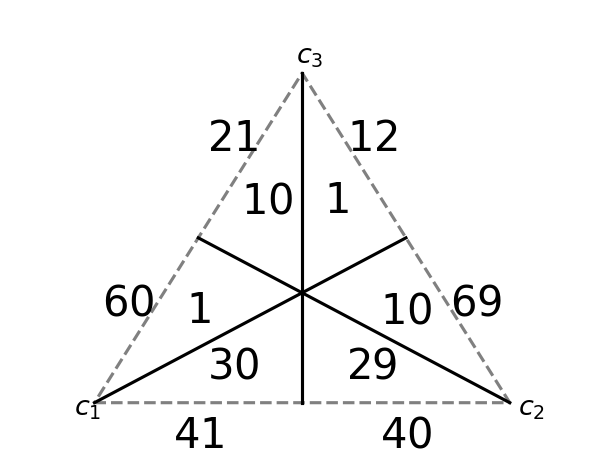

In [12]:
draw_on_rep_triangle(region_labels={"1": r"$30$",
                                   "2": r"$1$",
                                   "3": "$10$",
                                   "4": r"$1$",
                                   "5": r"$10$",
                                   "6": r"$29$"},
                     projections=[r"$41$",
                                  r"$60$",
                                  r"$21$",
                                  r"$12$",
                                  r"$69$",
                                  r"$40$",],
                    text_cols=TextColors(region_label="black", base_labels="black"),
                    figsize=(10, 8))

<IPython.core.display.Javascript object>


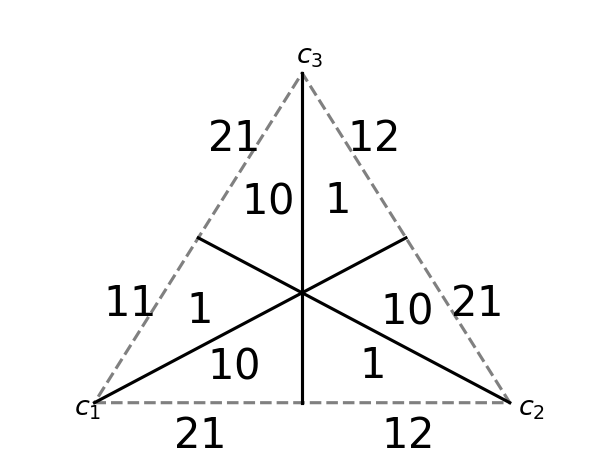

In [13]:
draw_on_rep_triangle(region_labels={"1": r"$10$",
                                   "2": r"$1$",
                                   "3": "$10$",
                                   "4": r"$1$",
                                   "5": r"$10$",
                                   "6": r"$1$"},
                     projections=[r"$21$",
                                  r"$11$",
                                  r"$21$",
                                  r"$12$",
                                  r"$21$",
                                  r"$12$",],
                    text_cols=TextColors(region_label="black", base_labels="black"),
                    figsize=(10, 8))

<IPython.core.display.Javascript object>


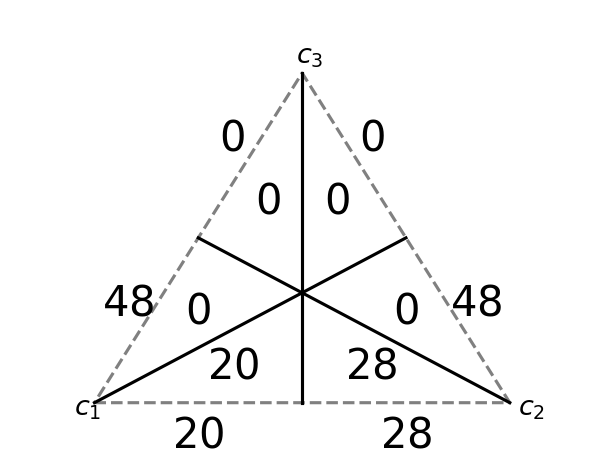

In [14]:
draw_on_rep_triangle(region_labels={"1": r"$20$",
                                   "2": r"$0$",
                                   "3": "$0$",
                                   "4": r"$0$",
                                   "5": r"$0$",
                                   "6": r"$28$"},
                      projections=[r"$20$",
                                  r"$48$",
                                  r"$0$",
                                  r"$0$",
                                  r"$48$",
                                  r"$28$",],
                    text_cols=TextColors(region_label="black", base_labels="black"),
                    figsize=(10, 8))

In [15]:
from itertools import product, permutations, groupby
import math

def pairwise_vote(v1, v2):
    return sum(np.array([x>y, x < y]) for x,y in zip(v1, v2))

def get_cycles(profile):
    pass

choice_num = 4
traits_num = 3
lists = traits_num*[list(permutations(range(choice_num)))]
print(f"Total profiles:{math.perm(choice_num)**traits_num}")
for item in product(*lists):
    profile = np.array(item).transpose()
    p1, p2 = pairwise_vote(v1:=profile[0], v2:=profile[1])
    p3, p4 = pairwise_vote(v2, v3:=profile[2])
    p5, p6 = pairwise_vote(v3, v1)
    if p1 > p2 and p3 > p4 and p5 > p6:
        print(v1, v2, v3)

Total profiles:13824
[0 1 2] [2 0 1] [1 2 0]
[0 1 3] [2 0 1] [1 2 0]
[0 1 3] [2 0 2] [1 2 0]
[0 1 3] [2 0 2] [1 2 1]
[0 1 2] [2 0 1] [1 3 0]
[0 1 3] [2 0 1] [1 3 0]
[0 1 3] [2 0 2] [1 3 0]
[0 1 3] [2 0 2] [1 3 1]
[0 2 2] [2 0 1] [1 3 0]
[0 2 3] [2 0 1] [1 3 0]
[0 2 3] [2 0 2] [1 3 0]
[0 2 3] [2 0 2] [1 3 1]
[0 2 1] [2 1 0] [1 0 2]
[0 2 1] [2 1 0] [1 0 3]
[0 2 2] [2 1 0] [1 0 3]
[0 2 2] [2 1 1] [1 0 3]
[0 2 2] [2 1 1] [1 3 0]
[0 2 3] [2 1 1] [1 3 0]
[0 2 3] [2 1 2] [1 3 0]
[0 2 3] [2 1 2] [1 3 1]
[0 3 1] [2 1 0] [1 0 2]
[0 3 1] [2 1 0] [1 0 3]
[0 3 2] [2 1 0] [1 0 3]
[0 3 2] [2 1 1] [1 0 3]
[0 3 1] [2 2 0] [1 0 2]
[0 3 1] [2 2 0] [1 0 3]
[0 3 2] [2 2 0] [1 0 3]
[0 3 2] [2 2 1] [1 0 3]
[0 3 1] [2 2 0] [1 1 2]
[0 3 1] [2 2 0] [1 1 3]
[0 3 2] [2 2 0] [1 1 3]
[0 3 2] [2 2 1] [1 1 3]
[0 1 2] [3 0 1] [1 2 0]
[0 1 3] [3 0 1] [1 2 0]
[0 1 3] [3 0 2] [1 2 0]
[0 1 3] [3 0 2] [1 2 1]
[0 1 2] [3 0 1] [1 3 0]
[0 1 3] [3 0 1] [1 3 0]
[0 1 3] [3 0 2] [1 3 0]
[0 1 3] [3 0 2] [1 3 1]
[0 2 2] [3 0 1] [1 

## 3.2 ペア多数決の幾何学

ペア $\{c_i,c_j\}$ に関する、ペア多数決写像 $f_{\{c_i,c_j\}}:Si(6) \rightarrow [-1,1]$ は、セクション3.1 で導入した「射影と和」を $Si(6)$ 上の選挙プロファイルに適用することにより、以下のように定義できる

$$
f_{\{c_1,c_2\}}(\mathbf{p}) = (p_1 + p_2 + p_3) - (p_4 + p_5 + p_6)\\
f_{\{c_2,c_3\}}(\mathbf{p}) = (p_1 + p_5 + p_6) - (p_2 + p_3 + p_4)\\
f_{\{c_3,c_1\}}(\mathbf{p}) = (p_3 + p_4 + p_5) - (p_1 + p_2 + p_6)
$$

この時 $f_{\{c_i,c_j\}}$ の値によって、以下のように社会的選択が対応する
- $f_{\{c_i,c_j\}}(\mathbf{p}) > 0$ の時、 $c_i \succ c_j$
- $f_{\{c_i,c_j\}}(\mathbf{p}) = 0$ の時、 $c_i \sim c_j$
- $f_{\{c_i,c_j\}}(\mathbf{p}) < 0$ の時、 $c_i \prec c_j$

これらの写像を使って、プロファイル $Si(6)$ から全てのペアを含むペア多数決の選挙結果への線形な写像 $F: Si(6) \rightarrow [-1,1]^3$ を 
$$
F(\mathbf{p})=(f_{\{c_1,c_2\}}(\mathbf{p}), f_{\{c_2,c_3\}}(\mathbf{p}), f_{\{c_3,c_1\}}(\mathbf{p}))
$$
と定義する事ができる。

我々はこの写像の像 $\text{Im}(F)$ と、$[-1,1]^3$ 内の非推移的な領域の重なりを調べることで、ペア多数決の非理性的な性質を理解することができる。

そのためにまず、
- $Si(6)$ は、全会一致結果(unanimous outcomes) $\{E_i\}_{i=1}^6$ を頂点とする凸包である
- 線形写像は凸包を凸包へ移す
- よって、像 $F(Si(6))$ は、$\{F(E_i)\}_{i=1}^6$ を頂点とする凸包である

事に留意する。

満場一致プロファイルの像の集合 $\{F(E_i)\}_{i=1}^6$ は、立方体 $[-1,1]^3$ の頂点の $(1,1,1),(-1,-1,-1)$ を除く6つの頂点に一致するので、これは立方体から正・負象限の三角錐を2つ取り除いた図形（反三角柱 triangular antiprism）になることがわかる。(下のプロット参照)

しかし、残念なことに $F(Si(6))$ の中には、循環的選択肢に対応する領域(正・負象限)は排除しきれず、一部が含まれてしまうのである。

ペア多数決は、選挙プロファイル空間 $F(Si(6))$ を、ペア毎の多数決の結果の空間 $[-1,1]^3$ に写像することにより、元々の空間にはなかった循環的な選好を含む領域に写してしまうのである。

### 3.2.1. The Geometry of Cycles (循環の幾何学)

__定理 3.2.1.__
1. 全てのペア $c_i, c_j$ の任意の順序 $\succ, \prec, \sim$ を同時に満たすようなプロファイル $\mathbf{p} \in Sim(6)$ が存在する。
2. $\mathbf{q} \in F(Si(6))^{\mathrm{o}}\;(\text{interior of }F(Si(6)))$ ならば、$F^{-1}(\mathbf{q})$ は $Si(6)$ の2次元線形部分空間。$\mathbf{q} \in \partial F(Si(6))$ ならば、$F^{-1}(\mathbf{q})$ は $Si(6)$ の1点。
3. $\forall \epsilon > 0$ 、$\exists \mathbf{p} \in Si(6)$ s.t. $f_{\{c_i, c_j\}}(\mathbf{p}) > 1 - \epsilon$ かつ $F(\mathbf{p})$ はサイクル。
4. サイクルにおいて、全ての選択肢が他の選択肢を$\frac{2}{3}$ より大きな票差を付けて勝つことはありえない。

証明略。

### 3.2.2. Cyclic Profile coordinates (循環プロファイル座標)

- プロファイルの投票者タイプを2つのグループに分ける
    - 奇数タイプ $\{1,3,5\}$ と偶数タイプ$\{2,4,6\}$ 。
    - $\mathbf{p} = \mathbf{p}_{odd} + \mathbf{p}_{even} = (p_1, 0, p_3, 0, p_5, 0) + (0, p_2, 0, p_4, 0, p_6)$
- $d := \|\mathbf{p}_{odd}\|_1 = p_1 + p_3 + p_5$ とおく。
- $ \alpha := F(\mathbf{a}), \text{ただし} \;
\mathbf{a} := 
\begin{cases}
&\frac{1}{d} \mathbf{p}_{odd}, \; d \ne 0\\
&\mathbf{0}, \; d=0  
\end{cases}$
- $\beta:= F(\mathbf{b}), \text{ただし} \;
\mathbf{b} := 
\begin{cases}
&\frac{1}{1-d} \mathbf{p}_{even}, \; 1 - d \ne 0\\
&\mathbf{0}, \; d=1  
\end{cases}$
- 以上の2つの3次元ベクトル$\alpha,\beta$とスカラー$d$を使い、$\mathbf{p}$ の像を表す。
    1. $F(\mathbf{p}) = d\alpha + (1-d)\beta$
    2. この$(\alpha, \beta, d)$ を __循環プロファイル座標__ と呼ぶ。
    3. $\mathbf{p} \leftrightarrow (\alpha, \beta, d)$ は全単射。
- 上の 1. を使えば、$(\alpha, \beta, d)$ は、反三角柱上に図示できる！
    - $\alpha$ は奇数タイプ、$\beta$ は偶数タイプの全会一致プロファイルの凸包なので、それぞれ半三角柱の底面、上面上に書ける。
    - 最終的な選挙結果 $F(\mathbf{p})$ は、これらの2点を $1-d:d$ で分割する点になる。

### 3.2.3. Power of cyclic coordinates (循環プロファイル座標の力)
時間とパワーがなかったので、ざっと雰囲気だけを読んでまとめた。（細かい確認はしてません）
- この循環プロファイル座標を使うことで
    - ある選挙結果が、奇数インデックス全会一致プロファイル($\alpha$-三角)と偶数インデックス全会一致プロファイル($\beta$-三角)のどちらの割合が多いかで見れる $d:1-d$
    - それぞれの三角の上の点は、それぞれのグループで優位な全会一致ランキングを反映している。
    - 定理3.2.1 の 2. の点 $\mathbf{q} \in F(Si(6))^{\mathrm{o}}$ の逆像 $F^{-1}(\mathbf{q})$ の「大きさ」が$F(Si(6))$ 内の領域の広さとして直接見ることができる。

### 3.2.4. The Return of Confused Voters (倒錯投票者の再来)
時間とパワーがなかったので、ざっと読んでまとめた。（細かい確認はしてません）
- 選挙結果プロファイルの半三角柱の大部分の点は、倒錯投票者プロファイルと全員一致結果との線形和で表せられる事が示せる。
    - ⇒ ペアワイズ多数決は、倒錯投票者の"意見"を重視し過ぎている。
- 倒錯投票者の票を取り除いた縮小プロファイル(reduced profile)と倒錯投票者のプロファイル集合(線分。これはどの縮小プロファイルにとっても同じ。)との凸包を作ると、多くの縮小プロファイルにおいて、全ての選択肢の推移的なランキングの領域を通る。
- 選択肢が $n>4$ の場合
    - ペアワイズ多数決の可能な結果の全空間: $[-1,1]^{{}_n C_2}$
    - 理性的=推移的なランキング(全会一致プロファイル)の数: $n!$
        - $n=4$ の場合、空間の次元=$2^{_4 C_2}=64$、$4! = 24$ ⇒ 推移的な全会一致プロファイル頂点の割合$\frac{24}{64}=37.5\%$
        - $n=10$ の場合、空間の次元=$2^{_10 C_2}=2^{45}$、$10!=3,628,800$　⇒ 推移的な全会一致プロファイル頂点の割合$\frac{10!}{2^{45}}\sim 0.00001\%$
        - 次元の呪い！
    - 同じ様に、ペアワイズ多数決の全プロファイル空間中の理性的なプロファイル集合（コンドルセ勝者を含む）の割合は次元が上がるにつれ急速に0に近づく。
    - これは、ペアワイズ多数決が倒錯投票者と理性的投票者の区別をできないために起こる問題である。
        - $2^{_n C_2} - n!$ 個の頂点は、倒錯投票プロファイルである！

<IPython.core.display.Javascript object>


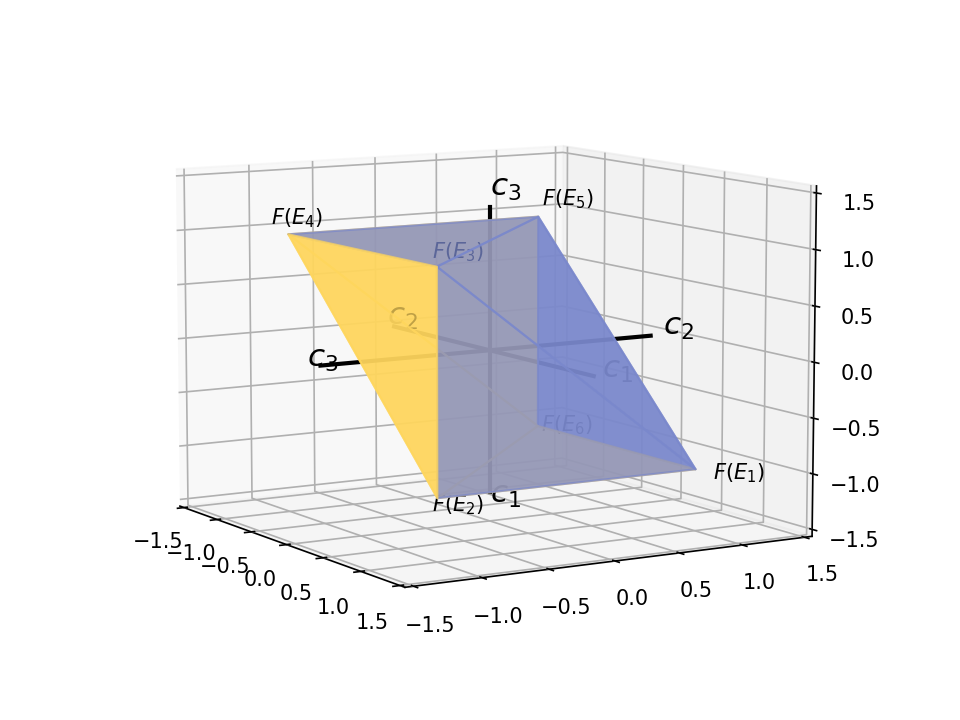

[1, 0, 0]
[-1, 0, 0]
[0, 1, 0]
[0, -1, 0]
[0, 0, 1]
[0, 0, -1]


In [18]:
fig = plt.figure()
ax = Axes3D(fig, 
            auto_add_to_figure=False, 
            xlim=(-1,1), ylim=(-1,1), zlim=(-1,1),
            )
ax.set_title(r"$F(Si(6))$")
fig.add_axes(ax)

origin3 = np.zeros(3)
e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
e3 = np.array([0,0,1])

E1 = e1 + e2 - e3 
E2 = e1 - e2 - e3
E3 = e1 - e2 + e3
E4 = -e1 - e2 + e3
E5 = -e1 + e2 + e3
E6 = -e1 + e2 - e3

vertices = [(E1, "$F(E_1)$"),
            (E2, "$F(E_2)$"),
            (E3, "$F(E_3)$"),
            (E4, "$F(E_4)$"),
            (E5, "$F(E_5)$"),
            (E6, "$F(E_6)$"),
           ]
blue = '#7A88CCC0'
yellow = '#FFD65DC0'
triangles = [(blue, np.array([E1, E3, E5])),
             (blue, np.array([E1, E2, E3])),
             (blue, np.array([E3, E4, E5])),
             (blue, np.array([E5, E6, E1])),
             (yellow, np.array([E2, E4, E6])),
             (yellow, np.array([E2, E3, E4])),
             (yellow, np.array([E4, E5, E6])),
             (yellow, np.array([E6, E1, E2])),
          ]

for col, triangle in triangles:
    ax.add_collection3d(Poly3DCollection([triangle], color=col))

for v, label in vertices:
    ax.text3D(*(1.085*v), label)


width = 1.5
ax.set_xlim(-width, width)
ax.set_ylim(-width, width)
ax.set_zlim(-width, width)

plot_axis_labels(ax, line_extension=0.3, d_label=0.4)
#plt.tight_layout()
plt.show()

# 第4章 順序付け投票とボルダスコアリング

"Positional Voting And the BC (Borda Count)"

# 第5章 その他の投票問題

"Other Voting Issues"

Let us construct a projection $p_{\hat{\textbf{n}} }$ on the plane perpendicular to
$$ \hat{\textbf{n}} := \frac{\textbf{e}_1 + \textbf{e}_2 + \textbf{e}_3}{\lVert \textbf{e}_1 + \textbf{e}_2 + \textbf{e}_3 \rVert_2}
= \left(\frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}\right)$$


Take the 1st perpendicular vector to be
$$\textbf{b}_1 = \textbf{e}_3 - (\textbf{e}_3 \cdot \hat{\textbf{n}})\hat{\textbf{n}}
=\begin{pmatrix}  0 \\ 0\\ 1 \end{pmatrix}
-\begin{pmatrix}  \frac{1}{3}\\ \frac{1}{3}\\ \frac{1}{3} \end{pmatrix}
= \begin{pmatrix}  -\frac{1}{3}\\ -\frac{1}{3}\\ \frac{2}{3} \end{pmatrix} $$
and normalizing it, we get the first base of the plane 
$$\hat{\textbf{b}}_1 = 
\begin{pmatrix}  -\frac{1}{\sqrt{6}}\\ -\frac{1}{\sqrt{6}}\\ \frac{2}{\sqrt{6}} \end{pmatrix}$$

$$\hat{\textbf{b}}_2 =
\begin{pmatrix}  \frac{1}{- \sqrt{6}}\\ - \frac{1}{\sqrt{6}}\\ \frac{2}{\sqrt{6}} \end{pmatrix} \times 
\begin{pmatrix}  \frac{1}{\sqrt{3}}\\ \frac{1}{\sqrt{3}}\\ \frac{1}{\sqrt{3}} \end{pmatrix}
= \begin{pmatrix}  - \frac{1}{\sqrt{2}}\\ \frac{1}{\sqrt{2}}\\ 0 \end{pmatrix}$$
Then $p_{\hat{\textbf{n}}}$ can be defined as follows
$$p_{\hat{\textbf{n}}}(\textbf{x}) = \sum_{i=1}^2 (\textbf{x} \cdot \hat{\textbf{b}}_i)\hat{\textbf{b}}_i$$
we represent the projected point as a point on 2D-plane comprehensing the coefficient $b_1$ of $\hat{\textbf{b}}_1$ as $y$-axis and the coefficient $b_2$ of $\hat{\textbf{b}}_2$ as $x$-axis.

In particular, the projected image of $\textbf{e}_i$ are
$$\left\{
\begin{pmatrix}  -\frac{1}{\sqrt{2}}\\ -\frac{1}{ \sqrt{6}} \end{pmatrix},
\begin{pmatrix}  \frac{1}{\sqrt{2}}\\ - \frac{1}{\sqrt{6}} \end{pmatrix},
\begin{pmatrix}  0 \\  \frac{2}{\sqrt{6}} \end{pmatrix}
\right\}
$$

<IPython.core.display.Javascript object>


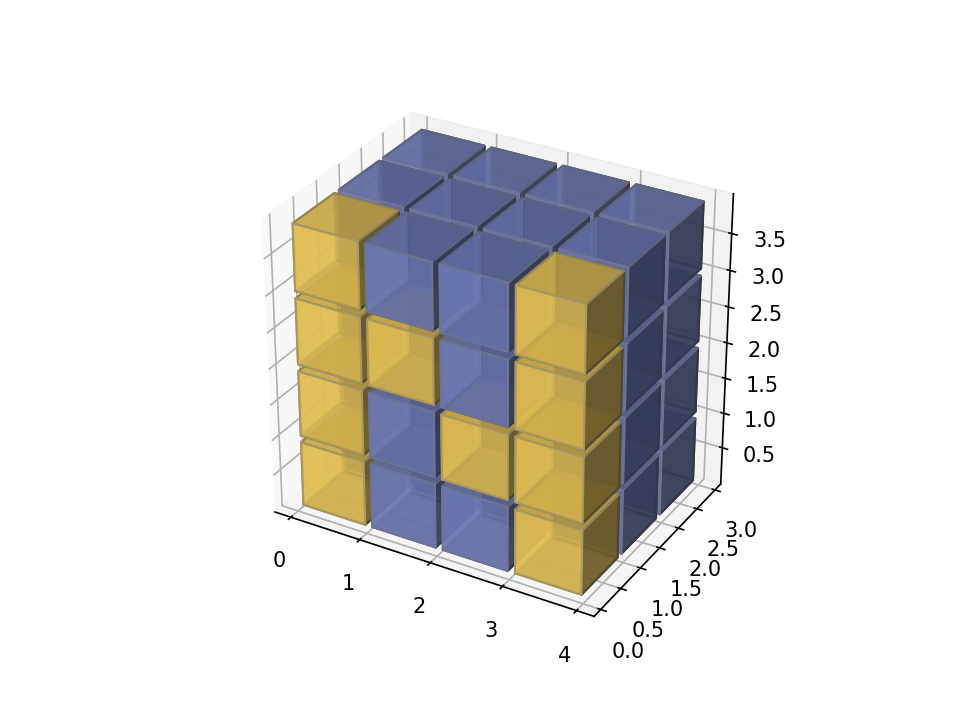

In [17]:
# Example code from matplolib tutorial
import matplotlib.pyplot as plt
import numpy as np


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.set_aspect('equal')

plt.show()